# KNN APPLIED TO THE NUMBER 9
**Names: ** Valery Ibarra Ibáñez, Yesid Leonardo López
## Description
In this script we will use the KNN algorithm to create a model that will predict when a number is 9.

First, we will import the libraries that we will use:

In [1]:
from sklearn import neighbors, datasets, metrics
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl #delete

The following function filter values for an specific value:

In [2]:
def filterValue(digits, value):
    filtered={"data":[],"target":[]}
    reshapedValues=digits.images.reshape((len(digits.images), -1))
    for i in range(0, len(digits.target)):
        if digits.target[i]==value:
            filtered.get("target").append(digits.target[i])
        else:
            filtered.get("target").append(0)
        filtered.get("data").append(reshapedValues[i])
                    

    return filtered

Now, we will get the dataset that contains the digits and filter by 9. Then, save features and target data in variables.

In [3]:
numbers = datasets.load_digits()


filteredValues=filterValue(numbers,9)
x=filteredValues.get("data") # the dimentions are reduced
y=filteredValues.get("target")

## K-Nearest Neighbors
Let's go to build the knn model!

In [18]:
k=1
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Then, let's save the predicted values to compare with the real values.

In [19]:
y_predicted=knn.predict(x)
print(y_predicted[0:30])
print(np.asarray(y[0:30]))

print(metrics.accuracy_score(y_predicted,y))


[0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 9]
[0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 9]
1.0


## Handmade model
Lets implement our handmade algorithm: 

In [20]:
def filterValue(digits, value):
    filteredList=[]
    filteredMatrix=[]
    for i in range(0, len(digits.target)-1):
        if digits.target[i]==value:
            filteredList.append(digits.images[i])
    return filteredList

def verifyBlackCol(digit,colIndex):
    isBlack=False
    blackAmount=0
    for i in range(0,8):
        if(digit[i][colIndex]<=3):
            blackAmount+=1
    if blackAmount==8:
        isBlack=True
    return blackAmount

def verifySecondCol(digit):
    answer=False
    amountAproved=0
    for i in range(4,8):
        if(digit[i][1]<4):
            amountAproved+=1
    if amountAproved==4:
        answer=True
    return answer

def verifyThirdCol(digit):
    column=getCol(digit,2)
    answer=False
    #if column[4]==0 or column[5]==0:
    if column[4]<4 or column[5]<4:
        answer=True
    return answer

def verifyFourthCol(digit):
    column=getCol(digit,3)
    answer=False
    #if column[4]==0 or column[5]==0:
    if column[4]<4 or column[5]<4:
        answer=True
    return answer


def verifyFifthCol(digit):
    column=getCol(digit,4)
    answer=False
    count=0
    for i in range(3,7):
        #if(column[i]<=4):
        if(column[i]<=5):
            count+=1
        #delete condition
        #if column[i]==0:
        #    answer=True
    #count > equals to 2
    if(count>=1):
        answer=True
    return answer

def verifySixthCol(digit):
    column=getCol(digit,5)
    answer=False
    count=0
    for i in range(1,len(column)):
        if(column[i]>8):
            count+=1
    #    if(count>=4 and column[0]<5):
    if(count>=4):
        answer=True
    return answer

def verifySeventhCol(digit):
    column=getCol(digit,6)
    answer=False
    count=0
    if column[0]<=4:
        count+=1

    if column[1]<=4:
        count+=1

    if column[2]<=4:
        count+=1

    if column[3]<=4:
        count+=1

    #if count>=2 and count2>1:
    if count>=2:
        answer=True

    return answer

def getCol(matrix,col):
    colList=[]
    for i in range(0,8):
        colList.append(matrix[i][col])
    return colList

def isNine(digit):
    answer= True
    if verifyBlackCol(digit,0)==False:
        answer=False
    if verifyBlackCol(digit,7)==False:
        answer=False
    if verifySecondCol(digit)==False:
        answer=False
    if verifyThirdCol(digit)==False:
        answer=False
    if verifyFourthCol(digit)==False:
        answer=False
    if verifyFifthCol(digit)==False:
        answer=False
    if verifySixthCol(digit)==False:
        answer=False
    return answer


then we get the predicted values:

In [21]:
handmadeAnswers=[]
for val in numbers.images:
    if isNine(val)==True:
        #print(val)
        handmadeAnswers.append(9)
    else:
        handmadeAnswers.append(0)
print(len(handmadeAnswers))
print(len(y))

1797
1797


## Metrics
The model is built so we have to see how correct is our model. For that, we will use the metrics library.

### KNN Confusion matrix

([<matplotlib.axis.YTick at 0x7f383357ed30>,
 <a list of 2 Text yticklabel objects>)

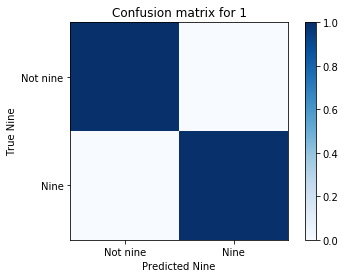

In [22]:
cm = metrics.confusion_matrix(y,y_predicted)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
title="Confusion matrix for "+str(k)
plt.ylabel('True Nine')
plt.xlabel('Predicted Nine')
plt.title(title)
plt.colorbar()
tick_marks=np.arange(2)
classes=["Not nine", "Nine"]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

In [23]:
print(cm)
print("The KNN model accuracy is :"+str(metrics.accuracy_score(y,y_predicted)))

[[1. 0.]
 [0. 1.]]
The KNN model accuracy is :1.0


### Handmade model confusion matrix:

([<matplotlib.axis.YTick at 0x7f382f401b70>,
 <a list of 2 Text yticklabel objects>)

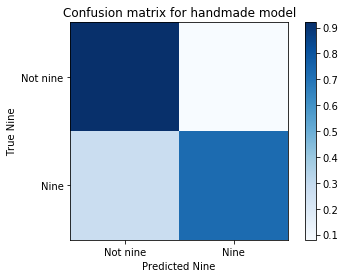

In [28]:
cm3 = metrics.confusion_matrix(y,handmadeAnswers)
cm3 = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]

plt.imshow(cm3, cmap=plt.cm.Blues)
title="Confusion matrix for handmade model"
plt.ylabel('True Nine')
plt.xlabel('Predicted Nine')
plt.title(title)
plt.colorbar()
tick_marks=np.arange(2)
classes=["Not nine", "Nine"]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

In [25]:
print(cm3)
print("The handmade model accuracy is :"+str(metrics.accuracy_score(y,handmadeAnswers)))

[[0.92022263 0.07977737]
 [0.27222222 0.72777778]]
The handmade model accuracy is :0.900946021146355


### Confusion matrix between handmade model and KNN answers:

([<matplotlib.axis.YTick at 0x7f38334e52b0>,
 <a list of 2 Text yticklabel objects>)

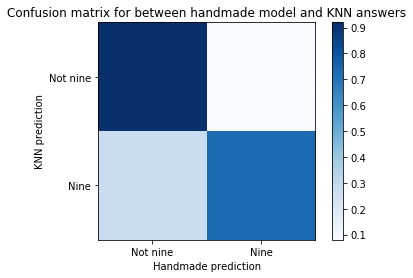

In [26]:
cm2 = metrics.confusion_matrix(y_predicted,handmadeAnswers)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

plt.imshow(cm2, cmap=plt.cm.Blues)
title="Confusion matrix for between handmade model and KNN answers"
plt.xlabel('Handmade prediction')
plt.ylabel('KNN prediction')
plt.title(title)
plt.colorbar()
tick_marks=np.arange(2)
classes=["Not nine", "Nine"]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)


In [27]:
print(cm2)
print("The accuracy between models is :"+str(metrics.accuracy_score(y_predicted,handmadeAnswers)))

[[0.92022263 0.07977737]
 [0.27222222 0.72777778]]
The accuracy between models is :0.900946021146355


# The End :)